# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul>
        <li><a href="#cleaning">Data Cleaning</a></li>
    </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction 

For my project, I will be using the TMDb movie dataset. The dataset contains information about 10866 movies collected from the Movie Database (TBDb). The dataset contains information about the title, cast, director, genre, production companies, popularity, budget, revenue, release date, and vote. 

I will answer the following questions with this dataset. 
-  What are the average popularities of movies according to budget levels? 
- What are the profit trends of movies from year to year? 
- What are the average runtimes of movies over the years? 
- Which are the 5 cheapest and most expensive profitable movies of all time? 
-  Which variables affect the revenue and popularity of a film? 

II. To find out which attributes lead to a successful/profitable movie the following information in terms of profitability needs to be extracted:</b>
- Genre 
- Actor/Actress 
- Director 
- Production Company 
- Budget 
- Runtime 

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, I load, check, and clean the data for analysis. 


### Data Description

In [6]:
# load the data 
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [13]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [14]:
df.shape

(10866, 21)

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
# Check data type, number of unique values, missing value
temp = {col: [df[col].dtype, df[col].nunique(), df[col].isnull().sum()] for col in df.columns}
temp_df = pd.DataFrame(temp)
temp_df.index = ['data type', 'unique values', 'missing value']
temp_df = temp_df.transpose()
temp_df

,data type,unique values,missing value
id,int64,10865,0
imdb_id,object,10855,10
popularity,float64,10814,0
budget,int64,557,0
revenue,int64,4702,0
original_title,object,10571,0
cast,object,10719,76
homepage,object,2896,7930
director,object,5067,44
tagline,object,7997,2824


In [15]:
# Check for duplicated rows
df.duplicated().sum()

1

> #### Observations
> 1. There are 21 columns (some columns contain unnecessary information). 
> 2. There is 1 duplicated row. 
> 3. The datatype of `release_date` is a string.
> 4. There are 0 values in the `budget` and `revenue` columns.
>  <br>

I address these issues in the data cleaning step. 


<a id='cleaning'></a>
### Data Cleaning

I carried out the following data cleaning steps:
1. Remove unnecessary columns - `id`, `imdb_id`, `homepage`, `tagline`, `keywords` and `overview`.
2. Drop dupicated values
3. Change datatype of column `release_date` from string to datetime.
4. Drop `budget` and `revenue`


> <h3>1. Deleting the columns that are not required</h3>

In [7]:
# list of columns that are to be deleted/dropped
cols = ['id', 'imdb_id', 'homepage',  'tagline', 'keywords', 'overview']

# deleting the columns
df.drop(cols, axis = 1, inplace = True)

#checking to see if the columns have been deleted
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


> <h3>2. Deleting duplicate rows (if any)</h3>

In [8]:
# dropping duplicate rows
# the first enrty is kept by default
df.drop_duplicates(inplace=True)

rows, col = df.shape
print('There are now {} columns and {} entries of movie data'.format(col, rows-1))

There are now 13 columns and 10864 entries of movie data


> <h3>3. Changing datatype of `release_date` column</h3>

In [9]:
df['release_date'] = pd.to_datetime(df['release_date']) 

In [10]:
# check if the change has taken place successfully
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

> <h3>4. Handling 0 values in `budget`, `revenue` and `runtime` columns</h3>

In [11]:
# Making a list of the 3 columns
temp_col = ['budget', 'revenue', 'runtime']

# Replacing all the 0 values with NaN
df[temp_col] = df[temp_col].replace(0, np.NAN)

In [12]:
# Dropping/Deleting all the NaN values
# Subset helps to define in which columns to look for missing values
df.dropna(subset = temp_col, inplace = True)
rows, col = df.shape

print('Now there are only {} entries'.format(rows-1))

Now there are only 3853 entries


>That is the end of our data cleaning process. Let us have a look at the dataset now.

In [13]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis
<br>Now that all the data has been cleaned as to our liking, we can go ahead, analyse the dataset and make some discoveries!

> ### I.) 1. What are the average popularities of movies according to budget levels?

In [14]:
# First we need to make columns for budget ranges
# We use the cut methods of the pandas library to do so
df['budget_ranges'] = pd.cut(df['budget'], df['budget'].describe()[3:8], labels = ['Low', 'Medium', 'Moderately High', 'High'])

In [15]:
# Having a look at our dataset after new column was added
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_ranges
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,High
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,High


In [16]:
# Now we find out the average popularities of each level
df.groupby('budget_ranges')['popularity'].mean()

budget_ranges
Low                0.686413
Medium             0.951718
Moderately High    1.142414
High               2.080911
Name: popularity, dtype: float64

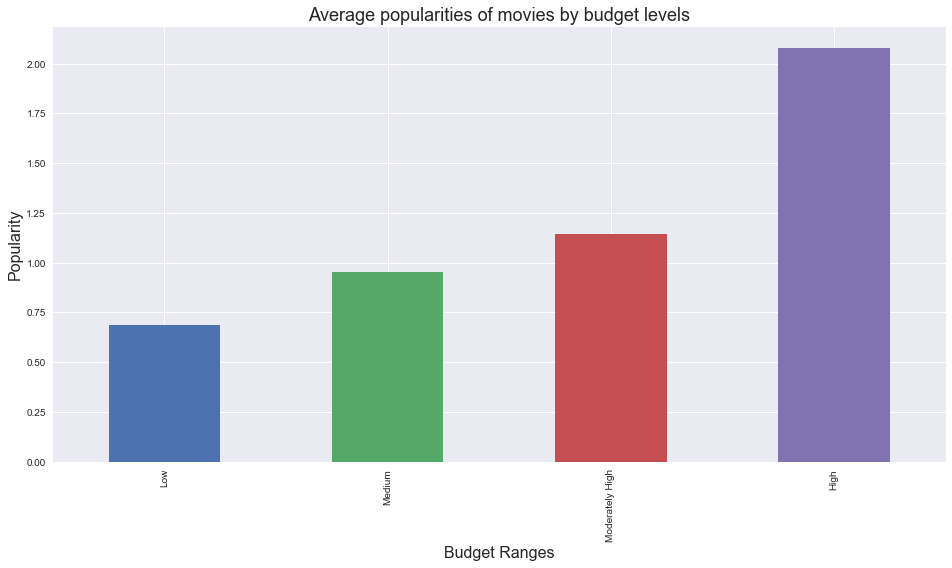

In [17]:
# Plotting the above information in a bar graph
sns.set()
df.groupby('budget_ranges')['popularity'].mean().plot(kind = 'bar', figsize = (16, 8))

# Setting the title of the plot
plt.title('Average popularities of movies by budget levels', fontsize = 18)

# Setting the x and y axis labels
plt.xlabel('Budget Ranges', fontsize = 16)
plt.ylabel('Popularity', fontsize = 16);

It can be observed that movies with a higher budget range tend to be more popular with the audience.

> ### I.) 2. What are profit trends from year to year?

In [18]:
# First we need to insert a column for the profit/loss value of each movie
df.insert(3, 'profit_loss', df['revenue'] - df['budget'])

In [19]:
# Check to see if column was inserted
df.head(2)

,popularity,budget,revenue,profit_loss,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_ranges
0,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,High
1,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,High


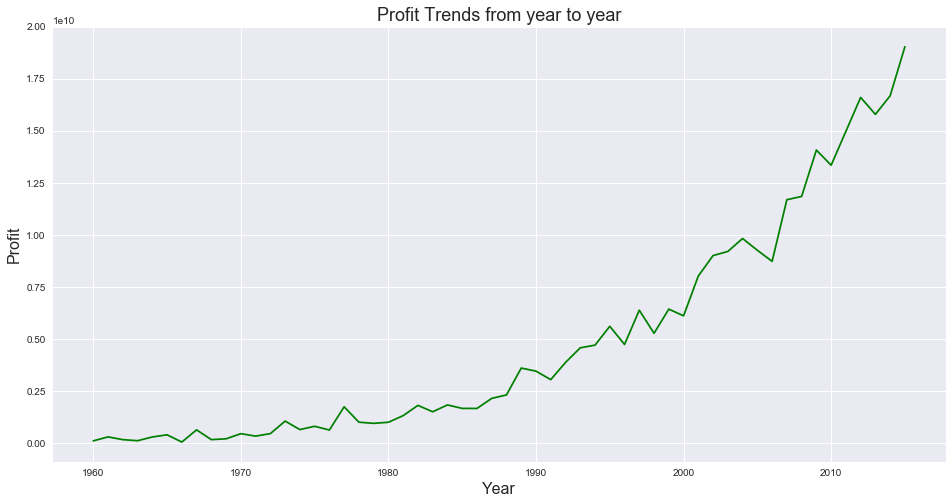

In [20]:
df.groupby('release_year')['profit_loss'].sum().plot(kind = 'line', figsize = (16, 8), color = 'g')
plt.title('Profit Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Profit', fontsize = 16);

Profits have increased exponentially with each passing year especially after the beginning of the 21st century.

> ### I.) 3. What are the average runtimes of movies over the years?

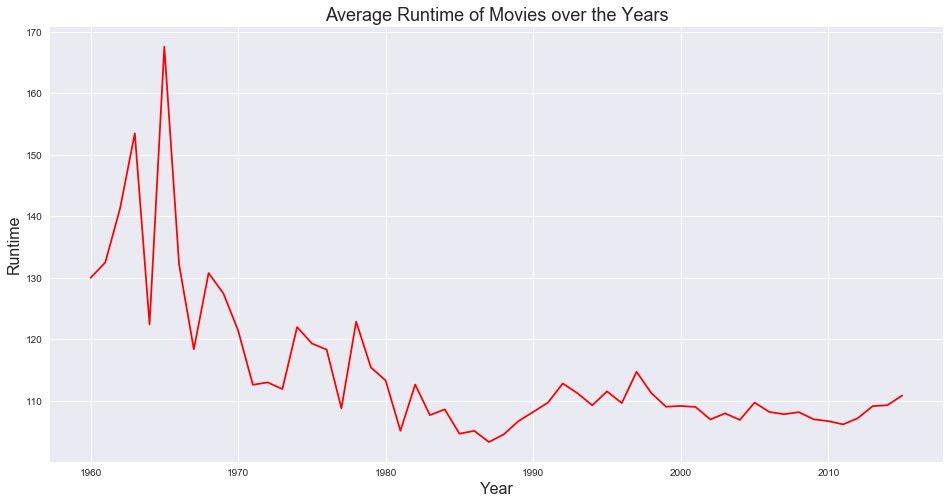

In [21]:
df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (16, 8), color = 'r')
plt.title('Average Runtime of Movies over the Years', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtime', fontsize = 16);

The runtime of movies has decreased with each passsing year. It experienced a hike during the 60s but has then steadily decreased over the years. The lowest was around 100-110 mintues. Presently, movies tend to last around the 110 minute mark.

>### I.) 4. Which are the 5 cheapest and most expensive profitable movies of all time?

<br><i>For this we shall set a standard value of profit which has to be met, that value will be $50,000,000</i>

In [22]:
# creating a list of columns that will be viewed
col = ['original_title', 'cast', 'director', 'budget', 'revenue', 'profit_loss']

# Using query function to show records of movies which have a profit of more than $50,000,000
# Also using sort_values function to make sure it is sorted according to the budget column

df.query('profit_loss>50000000')[col].sort_values('budget', ascending = False).head(5)

,original_title,cast,director,budget,revenue,profit_loss
3375,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,380000000.0,1.021683e+09,6.416830e+08
7387,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,300000000.0,9.610000e+08,6.610000e+08
14,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,280000000.0,1.405036e+09,1.125036e+09
6570,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,270000000.0,3.910812e+08,1.210812e+08
1929,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,260000000.0,5.917949e+08,3.317949e+08


In [23]:
df.query('profit_loss>50000000')[col].sort_values('budget', ascending = True).head(5)

,original_title,cast,director,budget,revenue,profit_loss
10495,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113.0,115103979.0,115103866.0
7447,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,Oren Peli,15000.0,193355800.0,193340800.0
2449,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,Daniel Myrick|Eduardo SÃ¡nchez,25000.0,248000000.0,247975000.0
7057,Open Water,Blanchard Ryan|Daniel Travis|Saul Stein|Michae...,Chris Kentis,130000.0,54667954.0,54537954.0
10759,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,300000.0,70000000.0,69700000.0


> ### I.) 5. Which variables affect the revenue and popularity of a film?

In [24]:
# Use corr to compute correlation of columns
df.corr()

,popularity,budget,revenue,profit_loss,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.446987,0.615535,0.596201,0.215092,0.780096,0.317866,0.173278
budget,0.446987,1.000000,0.688556,0.526818,0.260977,0.556937,0.024169,0.268040
revenue,0.615535,0.688556,1.000000,0.979133,0.250298,0.754567,0.227123,0.139140
profit_loss,0.596201,0.526818,0.979133,1.000000,0.220238,0.728348,0.259435,0.087971
runtime,0.215092,0.260977,0.250298,0.220238,1.000000,0.273771,0.351712,-0.112453
vote_count,0.780096,0.556937,0.754567,0.728348,0.273771,1.000000,0.387210,0.207191
vote_average,0.317866,0.024169,0.227123,0.259435,0.351712,0.387210,1.000000,-0.134246
release_year,0.173278,0.268040,0.139140,0.087971,-0.112453,0.207191,-0.134246,1.000000


<b>In case of revenue</b>
<ul>
    <li>Strong correlation with popularity, budget and vote count.</li>
    <li>Weak correlation with runtime.</li>
</ul>

<b>In case of popularity,</b>
<ul>
    <li>Moderate correlation with budget.</li>
    <li>Strong correlation with revenue, profit & loss and vote count</li>
</ul><br>

<h3>We shall now have a look at one of each level of correlation</h3><br>
<i><font size = 4>Strong Correlation: Budget vs Revenue</font></i>

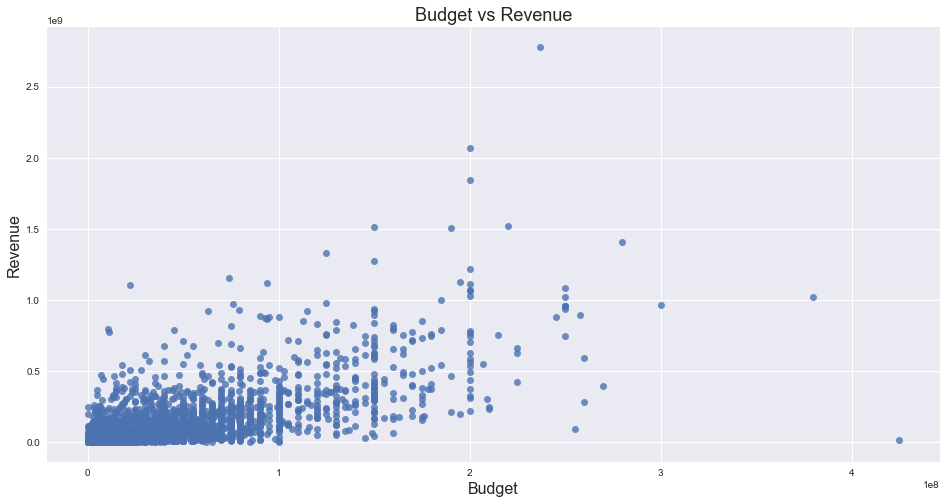

In [38]:
# Plotting scatterplots to view correlation visually

sns.regplot(x = df['budget'], y = df['revenue'], fit_reg = False)
# Obtaining plot size
fig_size = plt.rcParams["figure.figsize"]

# Changing the length and width of the plot
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.title('Budget vs Revenue', fontsize = 18)
plt.xlabel('Budget', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16);

<i><font size = 4>Moderate Correlation: Budget vs Popularity</font></i>

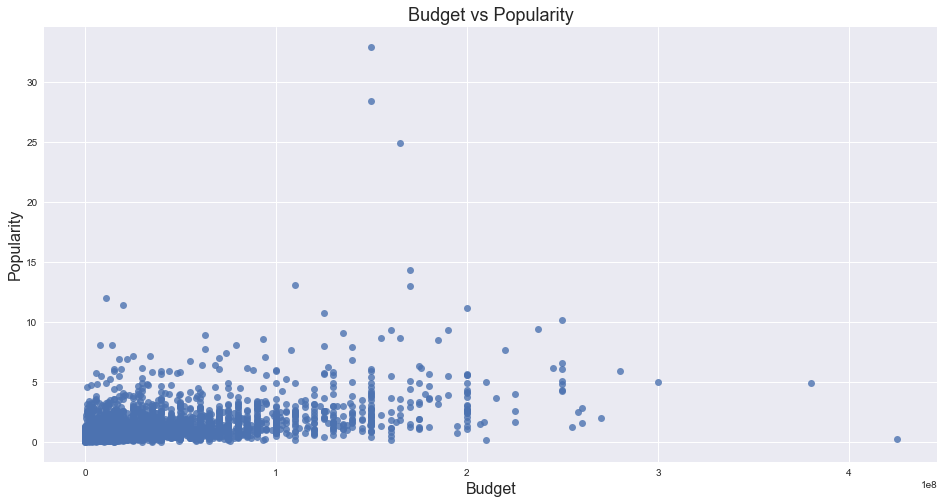

In [26]:
sns.regplot(x = df['budget'], y = df['popularity'], fit_reg = False)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8

plt.rcParams["figure.figsize"] = fig_size
plt.title('Budget vs Popularity', fontsize = 18)
plt.xlabel('Budget', fontsize = 16)
plt.ylabel('Popularity', fontsize = 16);

<i><font size = 4>Weak Correlation: Runtime vs Revenue</font></i>

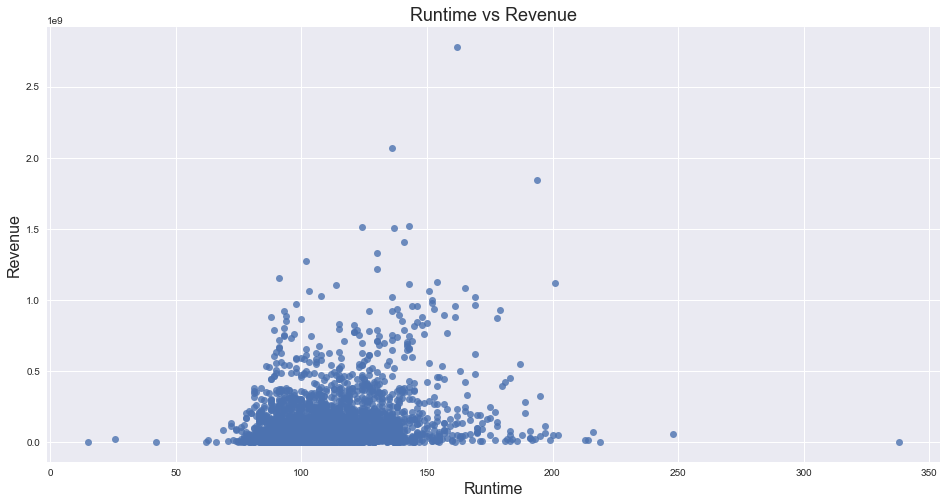

In [27]:
sns.regplot(x = df['runtime'], y = df['revenue'], fit_reg = False)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8

plt.rcParams["figure.figsize"] = fig_size
plt.title('Runtime vs Revenue', fontsize = 18)
plt.xlabel('Runtime', fontsize = 16)
plt.ylabel('Revenue', fontsize = 16);

> ### II.) 1. Genre

In [28]:
# First we will create a dataframe that holds data of all movies that have earned at least $50 million in profits
# Create a list of columns that are required
profit_col = ['original_title', 'cast', 'director', 'production_companies', 'genres', 'budget', 'revenue', 'runtime']
profit_df = df.query('profit_loss>50000000')[profit_col]

# View the newly created dataframe
profit_df.head(2)

,original_title,cast,director,production_companies,genres,budget,revenue,runtime
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,Action|Adventure|Science Fiction|Thriller,150000000.0,1.513529e+09,124.0
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,Action|Adventure|Science Fiction|Thriller,150000000.0,3.784364e+08,120.0


In [29]:
#function which will take any column as argument from and keep its track
def calculate_count(column):
    # Convert column to string and seperate it by '|'
    data = profit_df[column].str.cat(sep = '|')
    
    # Storing the values seperately in a Pandas series
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [30]:
#variable to store the retured value#variabl 
count = calculate_count('genres')

#printing top 5 values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

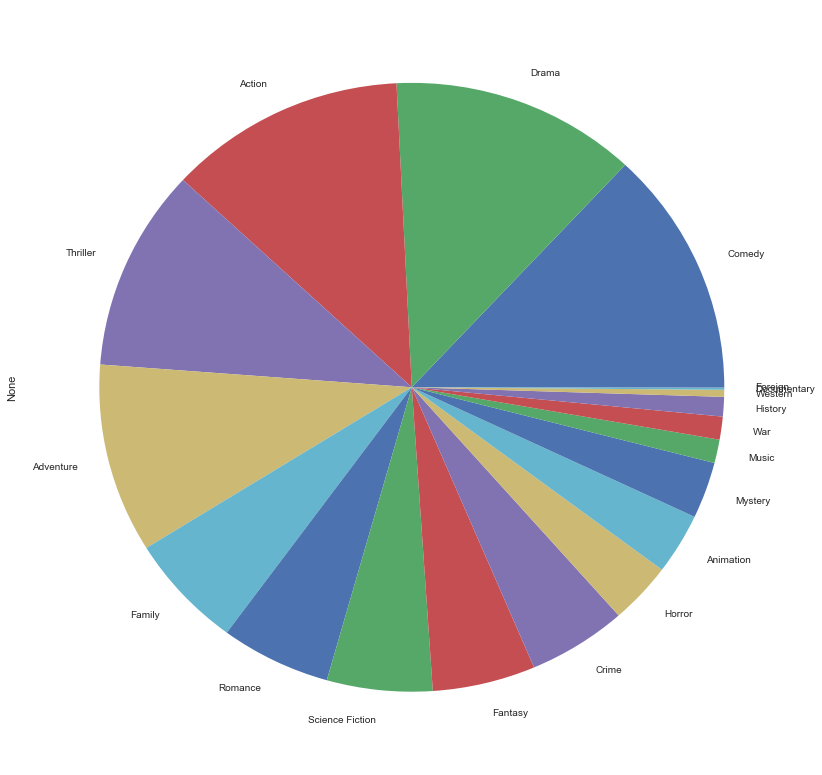

In [31]:
count.plot(kind='pie', figsize = (14, 14));

> ### II.) 2. Actor/Actress

In [32]:
#variable to store the retured value
count = calculate_count('cast')

#printing top 5 values
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

> ### II.) 3. Director

In [33]:
#variable to store the retured value
count = calculate_count('director')

#printing top 5 values
count.head()

Steven Spielberg    23
Robert Zemeckis     13
Clint Eastwood      12
Tim Burton          11
Tony Scott          10
dtype: int64

> ### II.) 4. Production Company

In [34]:
#variable to store the retured value
count = calculate_count('production_companies')

#printing top 5 values
count.head()

Universal Pictures                        156
Warner Bros.                              144
Paramount Pictures                        130
Twentieth Century Fox Film Corporation    118
Columbia Pictures                          93
dtype: int64

> ### II.) 5. Budget

In [35]:
# Retrieving the average budget
profit_avg_budget = profit_df['budget'].mean()
print('The average budget of a succesful movie is ${0:.2f}'.format(profit_avg_budget))

The average budget of a succesful movie is $60444957.76


> ### II.) 6. Runtime

In [36]:
# Retrieving the average runtime
profit_avg_runtime = profit_df['runtime'].mean()
print('The average runtime of a succesful movie is {0:.1f}'.format(profit_avg_runtime))

The average runtime of a succesful movie is 113.7


> ### Revenue that can be expected

In [37]:
# Retrieving the average revenue
profit_avg_runtime = profit_df['revenue'].mean()
print('The average revenue of a succesful movie is {0:.1f}'.format(profit_avg_runtime))

The average revenue of a succesful movie is 254957662.6


<a id='conclusions'></a>
## Conclusions

> From the above analysis, the following can be concluded as the criterias that need to be met in order to create a successful movie.
    > <ul> 
    > <li> The genre of the movie should be one of the these, Comedy, Drama, Action, Thriller or Adventure. </li>
    > <li> Cast should include one or more of, Tom Crusie, Brad Pitt, Tom Hanks, Sylvester Stallone or Cameron Diaz. </li>
    > <li> Director must be one or more of, Steven Spielberg, Robert Zemeckis, Clint Eastwood, Tim Burton or Ridley Scott. </li>
    > <li> Production company must be one or more of, Universal Pictures, Warner Bros., Paramount Pictures, Twentieth Century Fox Film Corporation or Columbia Pictures. </li>
    > <li> The budget of the movie must be around $60 million. </li>
    > <li> The runtime of the movie must be close to 2 hours or 113 mintues to be exact. </li>
    > </ul>

>    
>
>
> The revenue should be around $255 million if all of the above criterias are met.
<br>

<a id='limitations'></a>
## Limitiations

> <ul>
    > <li> The above conclusion is not a 100% formula to success as it only takes into considerations movies that have made a sizeable profit (50 million USD). Some movies may not have such a huge target as they canot get huge incestments so they settle for a much lower profit. There are a lot of cult movies too which may have earned revenue after it released in digital but not when they were out in theatres. </li>
    > <li> Also, the budget and revenue columns did not have a currency specified so there may be some differences due to fluctuating exchange rates. Different countries may also have different rules and regulations they have to follow which may restrict them from artistiic freedom. </li>
    > <li> Rows with NaN values were dropped, hence a lot of key data might have been lost in the process. </li>
    > <li> There are a lot of crew members apart from the director, cast and the production companies who help in creating a movie like writers, screenplay writers, editors, etc. but there was no data to analyse those aspects. </li> 
> </ul>